In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_curve

In [7]:
dataset = pd.read_csv("/Users/alert/Downloads/C-PEPTIDE/diabetes_data 2.csv")
dataset

,Unnamed: 0,Fasting_Blood_Glucose,Postprandial_Blood_Glucose,HbA1c,Random_Blood_Glucose,BMI,Waist_Circumference,Triglyceride_Levels,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Gestational_Diabetes,PCOS,Hypertension,Physical_Activity,Smoking,Alcohol_Consumption,Obesity,Diet,Sleep_Apnea,Diabetes_Status
0,0,118.690215,111.472598,5.570234,224.721689,29.299897,37.872710,212.064239,93.491951,100.418755,...,Yes,No,Yes,Yes,No,Yes,No,No,No,Positive
1,1,193.592860,172.123161,5.481873,253.236721,35.135808,39.468713,93.096591,106.809528,98.109810,...,Yes,No,No,No,Yes,No,No,Yes,No,Negative
2,2,165.159212,228.400792,9.437527,127.607617,34.004023,47.090948,268.098641,164.812122,56.702794,...,No,No,No,Yes,Yes,No,Yes,No,No,Positive
3,3,147.825603,204.478231,5.497277,213.721043,18.847498,36.800088,203.279060,159.009152,114.580068,...,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Positive
4,4,90.282423,217.115395,5.631698,201.501576,18.731237,47.392994,89.300971,121.557842,89.793054,...,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,81.731503,132.332546,5.712814,142.634373,31.867784,33.039740,127.180164,102.211989,82.196275,...,Yes,Yes,No,No,Yes,No,Yes,No,No,Negative
2996,2996,101.889512,122.206950,5.423619,178.741817,31.798141,34.648423,139.123233,118.578609,74.112063,...,Yes,No,Yes,Yes,No,Yes,No,No,Yes,Negative
2997,2997,93.294244,130.571657,5.311118,119.174624,24.852150,39.421332,112.996152,128.685327,71.592304,...,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Negative
2998,2998,100.005629,124.054126,5.145150,158.280116,26.359585,28.989608,122.985922,104.613596,74.805198,...,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Negative


In [51]:
dataset.columns.unique()

Index(['Unnamed: 0', 'Fasting_Blood_Glucose', 'Postprandial_Blood_Glucose',
       'HbA1c', 'Random_Blood_Glucose', 'BMI', 'Waist_Circumference',
       'Triglyceride_Levels', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'LDL_Cholesterol', 'HDL_Cholesterol',
       'CRP_Levels', 'Insulin_Levels', 'HOMA_IR', 'OGTT', 'Creatinine_Levels',
       'eGFR', 'Microalbuminuria', 'Uric_Acid_Levels', 'Fructosamine_Levels',
       'ALT', 'AST', 'C_Peptide', 'Proinsulin_Levels',
       'Family_History_of_Diabetes', 'Gestational_Diabetes', 'PCOS',
       'Hypertension', 'Physical_Activity', 'Smoking', 'Alcohol_Consumption',
       'Obesity', 'Diet', 'Sleep_Apnea', 'Diabetes_Status'],
      dtype='object')

In [119]:
dataset['Diabetes_Status'] = LabelEncoder().fit_transform(dataset['Diabetes_Status'])


In [118]:
last_col = dataset.columns[-1]
X = dataset[dataset.columns.difference([last_col])]
y = dataset[last_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_numeric = X_train.select_dtypes(include=np.number)

kbd = KBinsDiscretizer(
    n_bins=5,
    encode='ordinal',
    strategy='quantile'
)

X_train_binned = kbd.fit_transform(X_train_numeric)
selector = SelectKBest(score_func=chi2, k=15)
selector.fit(X_train_binned, y_train)

selected_features = X_train_numeric.columns[selector.get_support()]
selected_features

categorical_data = ['Family_History_of_Diabetes', 'Gestational_Diabetes',
'Physical_Activity', 'Smoking', 'Alcohol_Consumption',
       'Obesity', 'Diet', 'Sleep_Apnea']


numeric_data = selected_features


preprocessing = ColumnTransformer(transformers=[
    ("cat", Pipeline(steps=[
        ("encode", OneHotEncoder(drop="first", sparse_output=False))]), categorical_data),
    ("scale", Pipeline(steps=[
        ('scale', StandardScaler())]), numeric_data)
])


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


 Accuracy: 0.915, Precision 0.9040697674418605, Recall 0.9452887537993921 F1-Score = 0.9147375736950583


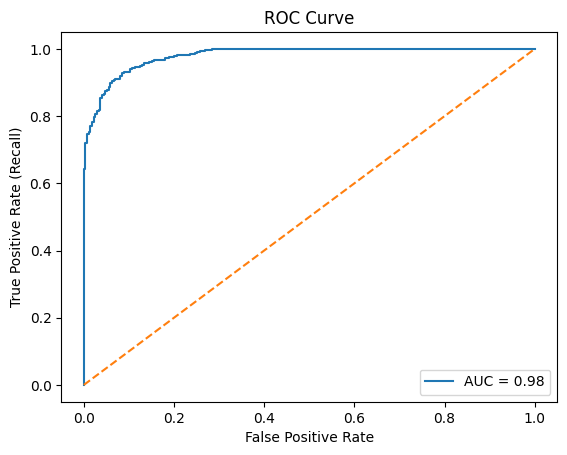

AUC: 0.9798898596888705
AUC: 0.9798898596888705


(array([0.38207599, 0.39688264, 0.31312448, 0.32322204, 0.33802583,
        0.36147703, 0.34410209, 0.30866891, 0.41195123, 0.34283265,
        0.37415686, 0.39027244, 0.32742557, 0.4397515 , 0.40946701]),
 Index(['ALT', 'AST', 'C_Peptide', 'Creatinine_Levels', 'Fasting_Blood_Glucose',
        'Fructosamine_Levels', 'HOMA_IR', 'HbA1c', 'Insulin_Levels',
        'LDL_Cholesterol', 'Microalbuminuria', 'OGTT',
        'Postprandial_Blood_Glucose', 'Proinsulin_Levels', 'eGFR'],
       dtype='object'))

In [131]:
base_models = [
    ("knn", KNeighborsClassifier(n_neighbors=5, weights="distance")),
    ("rfb", RandomForestClassifier(n_estimators=200, criterion="entropy", max_features="sqrt", max_depth=10, random_state=42)),
    ("dct", DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, max_features="sqrt", random_state=42)),
    ("xgb", XGBClassifier(learning_rate=0.8, n_estimators=200, max_depth=10, random_state=42)),
    ("svc", SVC(C=1, kernel="rbf", probability=True, random_state=42, gamma="scale")),
]

meta_model = LogisticRegression(C=10, class_weight="balanced")

stack_models = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True
)
processing = Pipeline(steps=[
    ("preprocess", preprocessing),
    ("model", stack_models)
])

numeric_selected = X_train[selected_features]
categorical = X_train.select_dtypes(exclude=np.number)

X_train_final = pd.concat([numeric_selected, categorical], axis=1)

processing.fit(X_train_final, y_train)
prediction = processing.predict(X_test)
print(f' Accuracy: {accuracy_score(y_test, prediction)}, Precision {precision_score(y_test, prediction)}, Recall {recall_score(y_test, prediction)} F1-Score = {f1_score(y_test, prediction, average="weighted")}')



confusion_matrix(y_test, prediction)
y_prob = processing.predict_proba(X_test)[:,1] # probability of positive class
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# AUC score
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)
print("AUC:", auc)
information_gain = mutual_info_classif(numeric_selected, y_train)
information_gain, selected_features